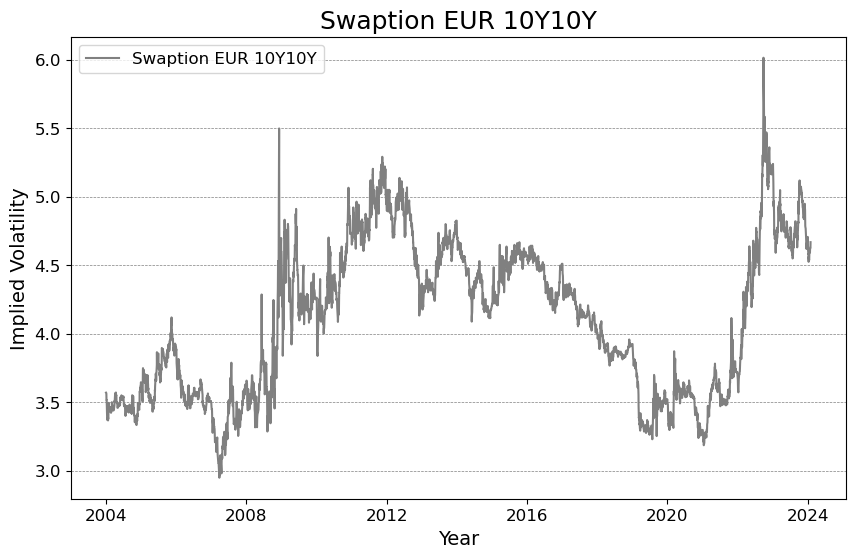

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('/Users/nannaingemannohrt/Desktop/master_thesis/main/data/ATM_10Y_10Y_from_2004_2024.xlsx', sheet_name='Ark1', engine='openpyxl')

plt.figure(figsize=(10, 6))
plt.plot(df["Dato"],df["ATM_10Y_10Y"], color='grey', label= 'Swaption EUR 10Y10Y')
plt.title('Swaption EUR 10Y10Y', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Implied Volatility', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()

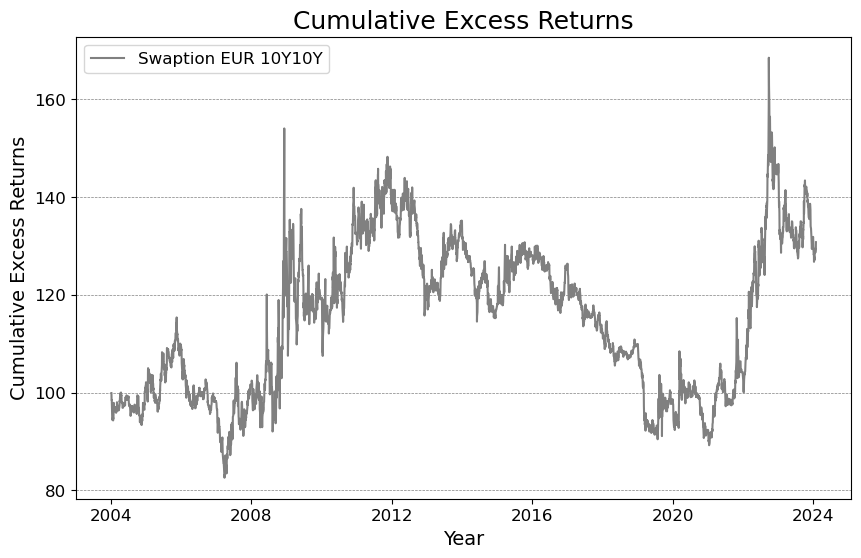

In [30]:
df['Returns'] = df["ATM_10Y_10Y"].pct_change()
    
# Assuming risk-free rate is 0, so excess returns are equal to actual returns in this case
df['Excess Returns'] = df['Returns']
    
# Calculate cumulative excess returns
df['Cumulative Excess Returns'] = (1 + df['Excess Returns']).cumprod()*100

plt.figure(figsize=(10, 6))
plt.plot(df["Dato"],df['Cumulative Excess Returns'], color='grey', label= 'Swaption EUR 10Y10Y')
plt.title('Cumulative Excess Returns', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Excess Returns', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


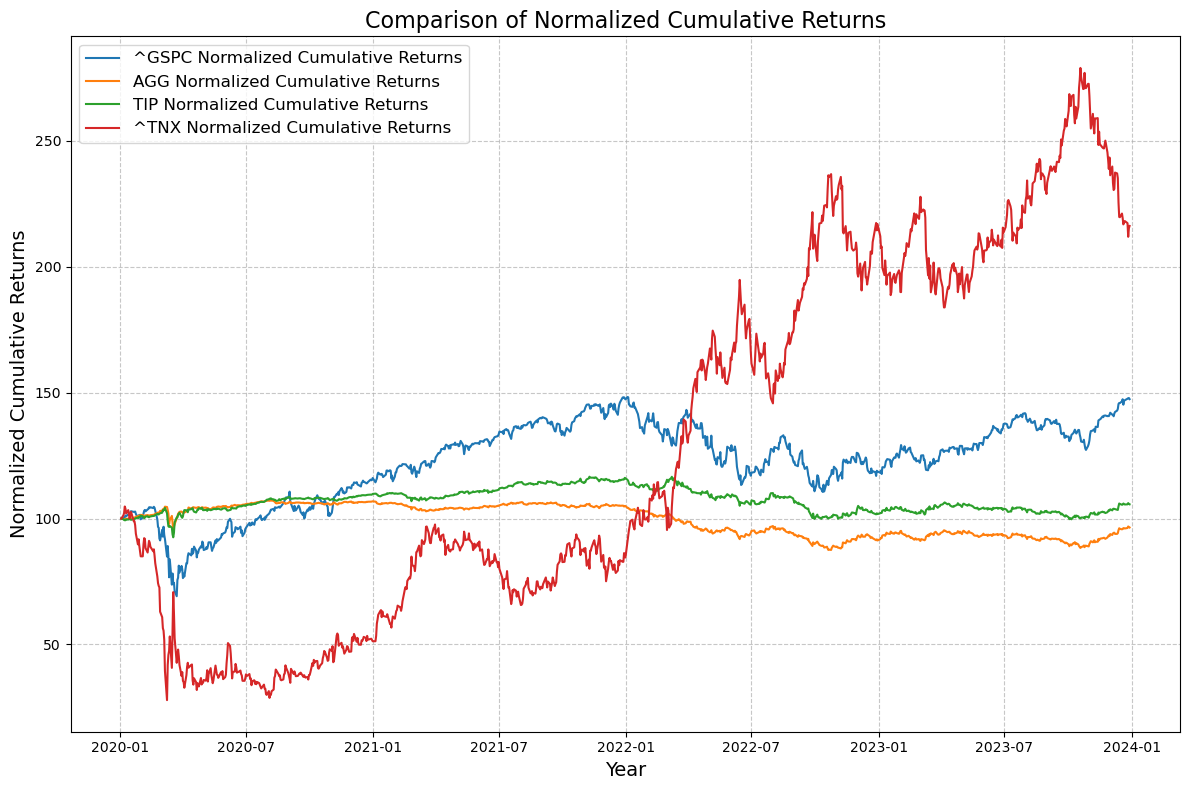

In [32]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Tickers for equities (S&P 500), nominal bonds (AGG), inflation-linked bonds (TIP), and 10-Year Treasury Yield (^TNX)
tickers = ['^GSPC', 'AGG', 'TIP', '^TNX']

# Start and end dates for the data
start_date = '2020-01-01'
end_date = '2024-01-01'

plt.figure(figsize=(12, 8))

for ticker in tickers:
    # Download historical data for the ticker
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Calculate daily returns
    data['Returns'] = data['Adj Close'].pct_change()
    
    # Calculate cumulative returns
    data['Cumulative Returns'] = (1 + data['Returns']).cumprod()
    
    # Normalize starting point to 100 for comparison
    initial_value = data['Cumulative Returns'].dropna().iloc[0]
    data['Normalized Returns'] = data['Cumulative Returns'] / initial_value * 100
    
    # Plot the normalized cumulative returns for each ticker
    plt.plot(data.index, data['Normalized Returns'], label=f'{ticker} Normalized Cumulative Returns')

# Adjust plot settings for better visualization
plt.title('Comparison of Normalized Cumulative Returns', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Normalized Cumulative Returns', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/var/folders/_b/zgcv3szx52v_rfyrvvjcb6y00000gn/T/ipykernel_12107/2003604627.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Returns'] = df_filtered["ATM_10Y_10Y"].pct_change()
/var/folders/_b/zgcv3szx52v_rfyrvvjcb6y00000gn/T/ipykernel_12107/2003604627.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Excess Returns'] = df_filtered['Returns']
/var/folders/_b/zgcv3szx52v_rfyrvvjcb6y00000gn/T/ipykernel_12107/2003604627.py:27: SettingWithCopyWarning: 
A value is trying to be se

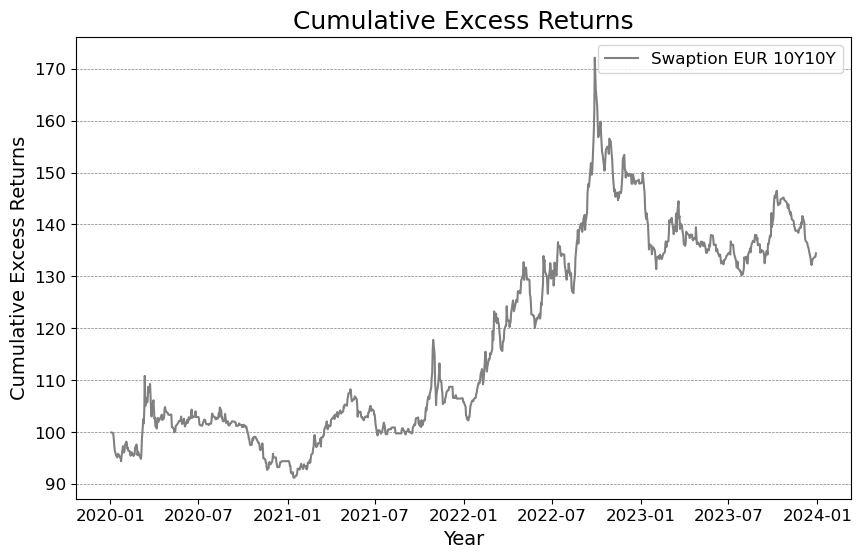

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame creation
# df = pd.DataFrame({
#     'Dato': pd.date_range(start='2020-01-01', periods=100, freq='M'),
#     'ATM_10Y_10Y': np.random.randn(100).cumsum()
# })

# Ensure 'Dato' column is in datetime format
df['Dato'] = pd.to_datetime(df['Dato'])

# Define your start and end dates here
start_date = '2020-01-01'  # Replace YYYY-MM-DD with your start date
end_date = '2024-01-01'    # Replace YYYY-MM-DD with your end date

# Filter the DataFrame based on the dates
df_filtered = df[(df['Dato'] >= start_date) & (df['Dato'] <= end_date)]

# Perform calculations on the filtered DataFrame
df_filtered['Returns'] = df_filtered["ATM_10Y_10Y"].pct_change()

# Assuming risk-free rate is 0, so excess returns are equal to actual returns in this case
df_filtered['Excess Returns'] = df_filtered['Returns']

# Calculate cumulative excess returns
df_filtered['Cumulative Excess Returns'] = (1 + df_filtered['Excess Returns']).cumprod()*100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_filtered["Dato"], df_filtered['Cumulative Excess Returns'], color='grey', label='Swaption EUR 10Y10Y')
plt.title('Cumulative Excess Returns', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Excess Returns', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


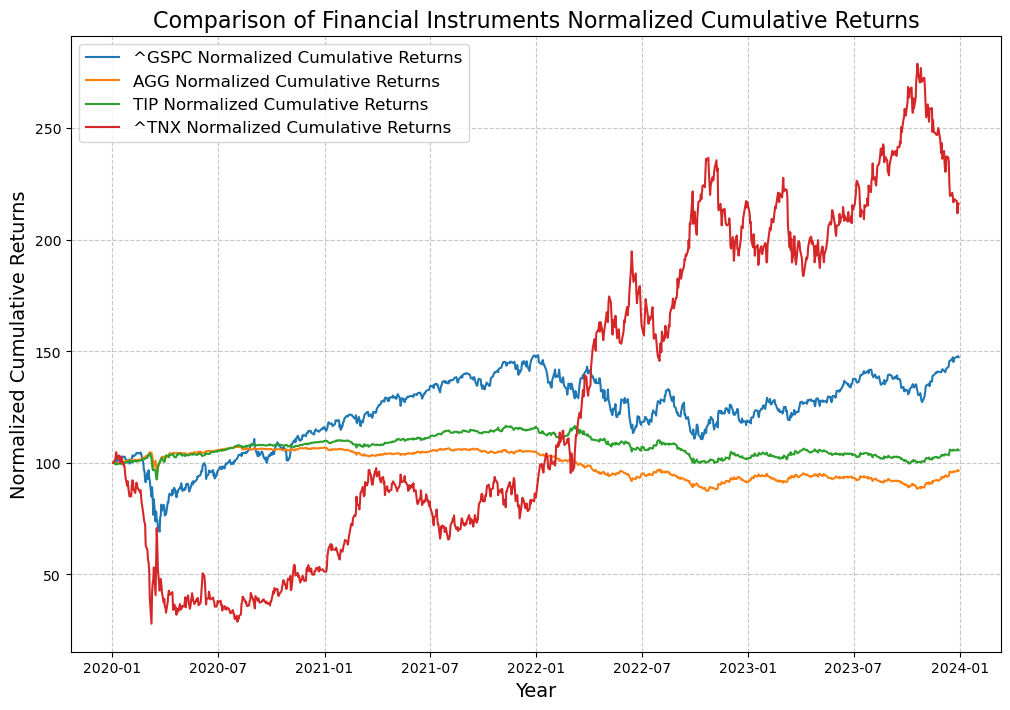

/var/folders/_b/zgcv3szx52v_rfyrvvjcb6y00000gn/T/ipykernel_12107/2262956433.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Returns'] = df_filtered["ATM_10Y_10Y"].pct_change()
/var/folders/_b/zgcv3szx52v_rfyrvvjcb6y00000gn/T/ipykernel_12107/2262956433.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Excess Returns'] = df_filtered['Returns']  # Assuming risk-free rate is 0
/var/folders/_b/zgcv3szx52v_rfyrvvjcb6y00000gn/T/ipykernel_12107/2262956433.py:51: SettingWithCopyWarn

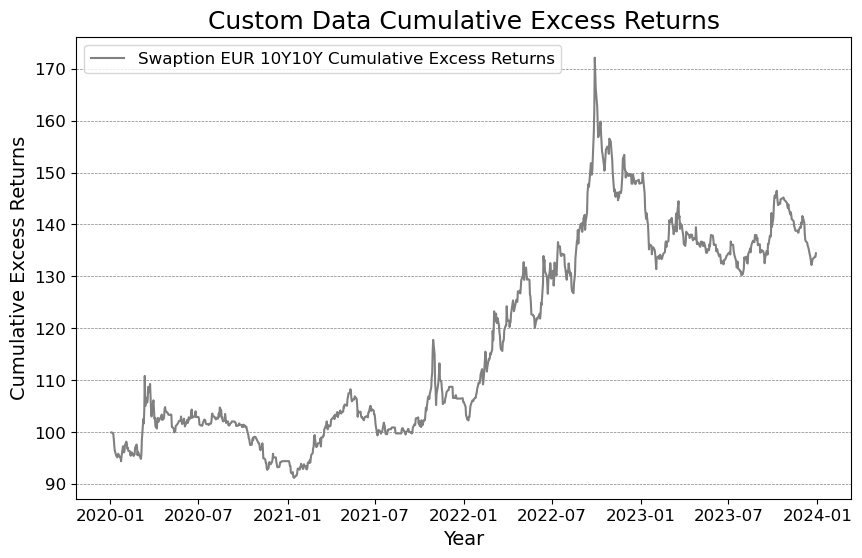

In [41]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Tickers for equities (S&P 500), nominal bonds (AGG), inflation-linked bonds (TIP), and 10-Year Treasury Yield (^TNX)
tickers = ['^GSPC', 'AGG', 'TIP', '^TNX']

# Start and end dates for the data
start_date = '2020-01-01'
end_date = '2024-01-01'

plt.figure(figsize=(12, 8))

for ticker in tickers:
    # Download historical data for the ticker
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Calculate daily returns
    data['Returns'] = data['Adj Close'].pct_change()
    
    # Calculate cumulative returns
    data['Cumulative Returns'] = (1 + data['Returns']).cumprod()
    
    # Normalize starting point to 100 for comparison
    initial_value = data['Cumulative Returns'].dropna().iloc[0]
    data['Normalized Returns'] = data['Cumulative Returns'] / initial_value * 100
    
    # Plot the normalized cumulative returns for each ticker
    plt.plot(data.index, data['Normalized Returns'], label=f'{ticker} Normalized Cumulative Returns')

# Adjust plot settings for the financial data
plt.title('Comparison of Financial Instruments Normalized Cumulative Returns', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Normalized Cumulative Returns', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Now, assuming you have a DataFrame 'df' similar to the second part of your request
# This block assumes 'df' is defined and formatted appropriately (e.g., with 'Dato' and 'ATM_10Y_10Y' columns)

# Ensure 'Dato' column is in datetime format
df['Dato'] = pd.to_datetime(df['Dato'])

# Filter the DataFrame based on the dates
df_filtered = df[(df['Dato'] >= start_date) & (df['Dato'] <= end_date)]

# Perform calculations on the filtered DataFrame
df_filtered['Returns'] = df_filtered["ATM_10Y_10Y"].pct_change()
df_filtered['Excess Returns'] = df_filtered['Returns']  # Assuming risk-free rate is 0
df_filtered['Cumulative Excess Returns'] = (1 + df_filtered['Excess Returns']).cumprod()*100

# Plotting the custom data
plt.figure(figsize=(10, 6))
plt.plot(df_filtered["Dato"], df_filtered['Cumulative Excess Returns'], color='grey', label='Swaption EUR 10Y10Y Cumulative Excess Returns')
plt.title('Custom Data Cumulative Excess Returns', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Excess Returns', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/var/folders/_b/zgcv3szx52v_rfyrvvjcb6y00000gn/T/ipykernel_12107/3071394526.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Returns'] = df_filtered["ATM_10Y_10Y"].pct_change()
/var/folders/_b/zgcv3szx52v_rfyrvvjcb6y00000gn/T/ipykernel_12107/3071394526.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

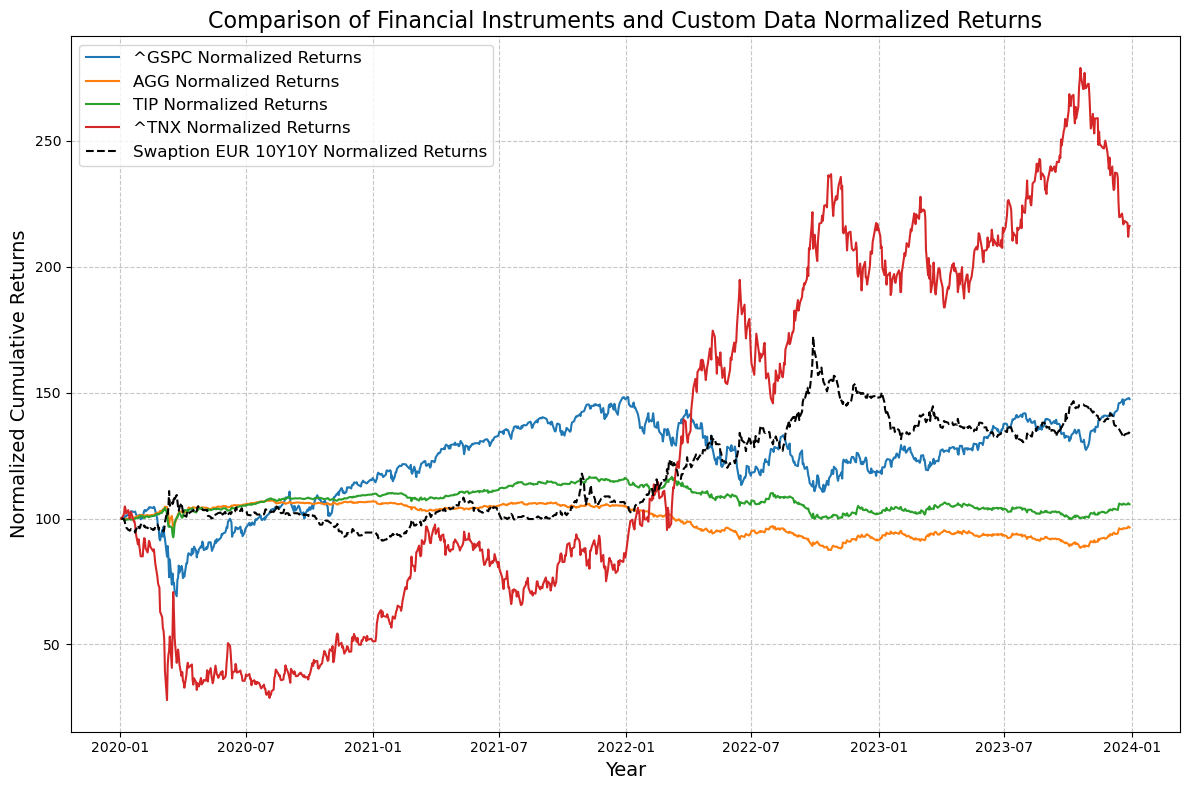

In [42]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Tickers for equities (S&P 500), nominal bonds (AGG), inflation-linked bonds (TIP), and 10-Year Treasury Yield (^TNX)
tickers = ['^GSPC', 'AGG', 'TIP', '^TNX']

# Start and end dates for the data
start_date = '2020-01-01'
end_date = '2024-01-01'

plt.figure(figsize=(12, 8))

for ticker in tickers:
    # Download historical data for the ticker
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Calculate daily returns
    data['Returns'] = data['Adj Close'].pct_change()
    
    # Calculate cumulative returns
    data['Cumulative Returns'] = (1 + data['Returns']).cumprod()
    
    # Normalize starting point to 100 for comparison
    initial_value = data['Cumulative Returns'].dropna().iloc[0]
    data['Normalized Returns'] = data['Cumulative Returns'] / initial_value * 100
    
    # Plot the normalized cumulative returns for each ticker
    plt.plot(data.index, data['Normalized Returns'], label=f'{ticker} Normalized Returns')

# Assuming you have a DataFrame 'df' similar to the second part of your request
# This block assumes 'df' is defined and formatted appropriately (e.g., with 'Dato' and 'ATM_10Y_10Y' columns)
# Ensure 'Dato' column is in datetime format and filter based on the dates
df['Dato'] = pd.to_datetime(df['Dato'])
df_filtered = df[(df['Dato'] >= start_date) & (df['Dato'] <= end_date)]

# Perform calculations on the filtered DataFrame
df_filtered['Returns'] = df_filtered["ATM_10Y_10Y"].pct_change()
df_filtered['Excess Returns'] = df_filtered['Returns']  # Assuming risk-free rate is 0
df_filtered['Cumulative Excess Returns'] = (1 + df_filtered['Excess Returns']).cumprod()*100

# Normalize starting point to 100 for comparison with other plots
initial_value_custom = df_filtered['Cumulative Excess Returns'].dropna().iloc[0]
df_filtered['Normalized Cumulative Excess Returns'] = df_filtered['Cumulative Excess Returns'] / initial_value_custom * 100

# Plot the custom data
plt.plot(df_filtered['Dato'], df_filtered['Normalized Cumulative Excess Returns'], label='Swaption EUR 10Y10Y Normalized Returns', color='black', linestyle='--')

# Adjust plot settings
plt.title('Comparison of Financial Instruments and Custom Data Normalized Returns', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Normalized Cumulative Returns', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CPI-U']: Exception('%ticker%: No timezone found, symbol may be delisted')


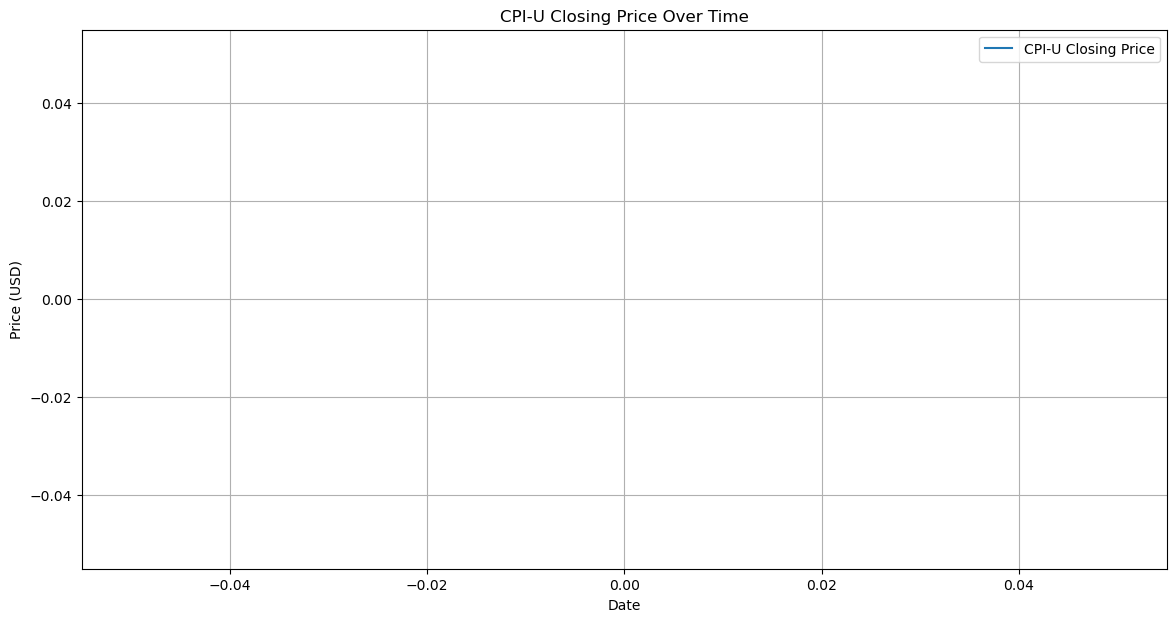

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Replace 'AAPL' with your desired ticker. For CPI data, you would need a different approach as explained.
ticker_symbol = 'CPI-U'

# Fetch historical data for the ticker
data = yf.download(ticker_symbol, start="2022-01-01", end="2022-12-31")

# Plotting the closing prices
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label=f'{ticker_symbol} Closing Price')
plt.title(f'{ticker_symbol} Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()
